# Recover transits with *Deep-Transit*

In [1]:
import lightkurve as lk
# search_result = lk.search_lightcurve('pi Men', mission='TESS', exptime='short', author='SPOC')
# search_result

In [2]:
lc = search_result.download_all().stitch()

NameError: name 'search_result' is not defined

In [3]:
# lc = lc[(lc.time.value>300)&(lc.time.value<400)]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

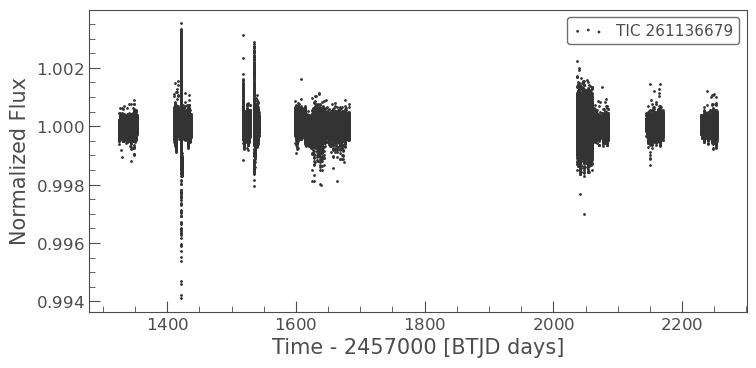

In [7]:
lc.scatter()

In [2]:
def tess_id_to_lc(ticid, product='spoc'):
    from glob import glob
    lc_collection = []
    if product == 'spoc':
        lc_file_paths = glob(f'/home/ckm/.lightkurve-cache/mastDownload/TESS/*{ticid}*s/*lc.fits')
    elif product == 'qlp':
        lc_file_paths = glob(f'/home/ckm/.lightkurve-cache/mastDownload/HLSP/*qlp*{ticid}*/*lc.fits')

    for i in lc_file_paths:
        lc_collection.append(lk.read(i).remove_nans())
    return lk.LightCurveCollection(lc_collection)

In [5]:
lc = tess_id_to_lc(100014359).stitch()
lc.sort('time')

In [4]:
import deep_transit as dt

In [5]:
dt.config.DATASET = '/home/ckm/PycharmProjects/Deep-LC/YOLO-transit-SNR/Data'
dt.config.IMG_DIR = dt.config.DATASET + "/transit-images/"
dt.config.LABEL_DIR = dt.config.DATASET + "/transit-labels/"
dt.config.BATCH_SIZE = 2

In [3]:
dt.train()

/home/ckm/PycharmProjects/Deep-LC/YOLO-transit-SNR/Data


/home/ckm/miniconda3/envs/deep-transit/lib/python3.8/site-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.


  0%|          | 0/27957 [00:00<?, ?it/s]

/home/ckm/miniconda3/envs/deep-transit/lib/python3.8/site-packages/torch/cuda/amp/autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.


KeyboardInterrupt: 

In [6]:
transit_boxes = dt.DeepTransit(lc, is_flatten=False).transit_detection('../models/Model_TESS.pth', batch_size=2)

Loading Model: ../models/Model_TESS.pth


/home/ckm/PycharmProjects/Deep-Transit/src/deep_transit/dt_lightcurve.py:325: UserWarning: The total number of progress bar is roughly estimated
4it [00:40, 10.16s/it]                       


In [7]:
%matplotlib inline

In [10]:
lc = dt.detrend_light_curve(lc)

In [12]:
?dt.detrend_light_curve

Signature:
dt.detrend_light_curve(
    lc_object,
    window_length=0.5,
    edge_cutoff=0.5,
    break_tolerance=0.5,
    cval=5.0,
    sigma_upper=3,
    sigma_lower=20,
)
Docstring:
Detrend a light curve for upcoming transit searching with wotan biweight method and sigma clipping
https://github.com/hippke/wotan
Parameters
----------
lc_object : `~lightkurve.LightCurve` instance
            Input light curve object
window_length : float
                The length of the filter window in units of ``time``, default is 0.5
edge_cutoff : float
              Length (in units of time) to be cut off each edge, default is 0.5
break_tolerance : float
                  Split into segments at breaks longer than that, default is 0.5
cval : float
       Tuning parameter for the robust estimators, default is 5.0
sigma_upper : float
sigma_lower : float
Returns
-------
flatten_lc : `~lightkurve.LightCurve` instance
File:      ~/PycharmProjects/Deep-Transit/src/deep_transit/dt_lightcurve.py
Type:    

<AxesSubplot:xlabel='Time (day)', ylabel='Normalized Flux'>

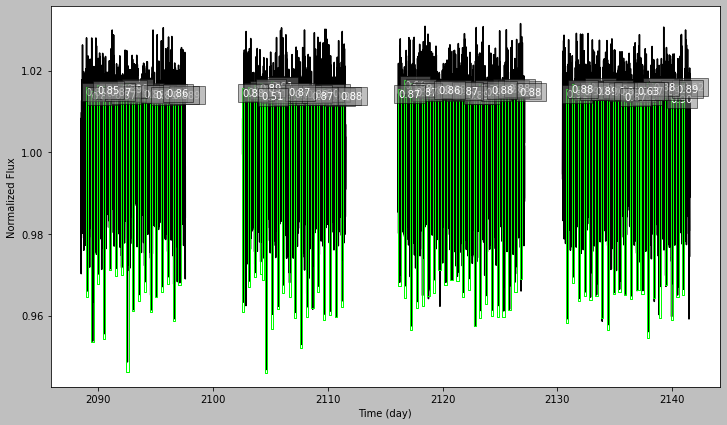

In [11]:
dt.plot_lc_with_bboxes(lc, transit_boxes)

In [8]:
import matplotlib.pyplot as plt

In [9]:
flatten_lc = dt.detrend_light_curve(lc)

(1643.0, 1646.0)

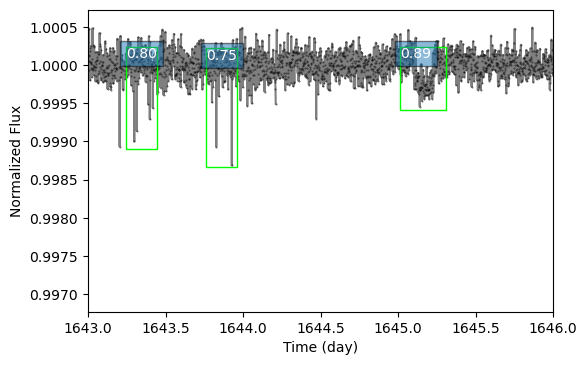

In [26]:
fig, ax = plt.subplots(dpi=100)
ax = dt.plot_lc_with_bboxes(flatten_lc, bboxes, ax=ax, color='k', marker='.', ms=1, alpha=0.5)
ax.set_xlim([1643, 1646])

# Astronimical Test

## Compared with 